# Exercício: Limpeza de Dados

Dados retirados de: https://www.kaggle.com/competitions/sberbank-russian-housing-market

In [3]:
!wget https://www.dropbox.com/s/0bl91ufgvfarhjh/housing_market.csv?dl=0 -O housing_market.csv

--2022-04-17 17:51:19--  https://www.dropbox.com/s/0bl91ufgvfarhjh/housing_market.csv?dl=0
Carregou certificado CA "/etc/ssl/certs/ca-certificates.crt"
Resolvendo www.dropbox.com (www.dropbox.com)... 2620:100:601d:18::a27d:512, 162.125.5.18
Conectando-se a www.dropbox.com (www.dropbox.com)|2620:100:601d:18::a27d:512|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 301 Moved Permanently
Localização: /s/raw/0bl91ufgvfarhjh/housing_market.csv [redirecionando]
--2022-04-17 17:51:20--  https://www.dropbox.com/s/raw/0bl91ufgvfarhjh/housing_market.csv
Reaproveitando a conexão existente para [www.dropbox.com]:443.
A requisição HTTP foi enviada, aguardando resposta... 302 Found
Localização: https://uc405e154dd4e51d1f6e1b9b764d.dl.dropboxusercontent.com/cd/0/inline/BjniTV_WElJEE631pK6sFjnOJUeMWgAWHY1ajVd9OfS7bCs2zef1V6q588MhS7-nqKVg9u6SgCHywUJp-E_rYtC3UdmdYhXcv42FASL7edOegrZbmaAs5tBM55Eh0cDp_PeHskgCBRvLrzO_DSXKTmUPHc1BQ5P7GTlhFmG11IIgFA/file# [redirecionando]
--2022-04-17

In [1]:
# Tríade de bibliotecas de ciência de dados
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12,8)

O objetivo da base de dados que estamos utilizando é inferir a coluna `price_doc`, indicando o preço de uma propriedade. As outras colunas são atributos da propriedade (ex: `full_sq`: área em metros quadrados) ou da vizinhança (ex: `market_shop_km` distância até o mercado mais próximo).

Recomendo checar o dicionário completo de dados: https://www.dropbox.com/s/i9mu82pmxlin6vm/data_dictionary.txt?dl=0

In [41]:
df = pd.read_csv("housing_market.csv")
print(df.shape)
display(df.head())

(30471, 292)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


### Selecionando colunas numéricas e nominais

In [3]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

## Dados Faltantes

### Q1. Imprima o percentual de dados faltantes

* Por coluna (ordenado do maior para o menor)
* Total

Dica: A função `isnull()` pode ser aplicada a todo o dataframe ou colunas específicas, retornando uma máscara binária indicando a posição de valores NaN.
```
df[col].isnull()
df.isnull()
```

In [4]:
# Calcular dados faltantes(NaN) por coluna
columns                 = df.columns.values
columns_nan_porcentages = {}
columns_length          = len(df.values)

for col in columns:
    column_nan_count             = df[col].isnull().sum()
    columns_nan_porcentages[col] = column_nan_count / columns_length

print(dict(sorted(columns_nan_porcentages.items(), key=lambda item: item[1], reverse=True)))

# Calcular dados faltantes totais
total_count_nan = df.isnull().sum().sum()
print(total_count_nan / df.size)
       

{'hospital_beds_raion': 0.4739260280266483, 'build_year': 0.44649010534606676, 'state': 0.44498047323684814, 'cafe_sum_500_min_price_avg': 0.43585704440287487, 'cafe_sum_500_max_price_avg': 0.43585704440287487, 'cafe_avg_price_500': 0.43585704440287487, 'max_floor': 0.31413475107479244, 'material': 0.31413475107479244, 'num_room': 0.31413475107479244, 'kitch_sq': 0.31413475107479244, 'preschool_quota': 0.2194873814446523, 'school_quota': 0.21938892717665978, 'cafe_sum_1000_min_price_avg': 0.21410521479439468, 'cafe_sum_1000_max_price_avg': 0.21410521479439468, 'cafe_avg_price_1000': 0.21410521479439468, 'life_sq': 0.20947786419874634, 'raion_build_count_with_material_info': 0.16379508385021824, 'build_count_block': 0.16379508385021824, 'build_count_wood': 0.16379508385021824, 'build_count_frame': 0.16379508385021824, 'build_count_brick': 0.16379508385021824, 'build_count_monolith': 0.16379508385021824, 'build_count_panel': 0.16379508385021824, 'build_count_foam': 0.16379508385021824, '

### Q2. Decida como lidar com os dados faltantes

Dentre as alternativas a seguir, defina como tratar as diferentes ocorrências de dados faltantes e **justifique suas escolhas**.

* Remover a instância/amostra/linha
* Remover o atributo/dimensão/coluna
* Imputar dados (zero, média, moda, mediana, etc.)

**Atenção**: Dados numéricos e não-numéricos devem receber tratamentos diferentes caso decida imputar dados. Estes dados foram separados para você na célula "Selecionando colunas numéricas e nominais" deste notebook.

In [7]:
"""
Linhas que possui contadores ('count'), substitui os nan com o valor 0,
Colunas com médias ('avg') possui alguns casos em especificos
* Se a porcentagem de nans é maior que 0.2 será difícil criar imputar dados sem criar nenhum tipo de vies,
para evitar isso, retiramos a coluna
* Se a porcentagem de nans é menor que 0.2, podemos estimar o valores restantes com uma média
"""

import statistics as st

new_df = df.copy()

for col in columns:
    if columns_nan_porcentages[col] > 0:
        print(f' coluna: {col} | porcentagem: {columns_nan_porcentages[col]} | {col in non_numeric_cols}')
        
        if 'count' in col:
            new_df[col].fillna(0, inplace=True)
        elif 'ID' in col:
            m = st.mode(df[col])
        elif 'avg' in col:
            
            if columns_nan_porcentages[col] > 0.2:
                new_df.drop(col, axis=1, inplace=True)
                     

 coluna: life_sq | porcentagem: 0.20947786419874634 | False
 coluna: floor | porcentagem: 0.005480620918250139 | False
 coluna: max_floor | porcentagem: 0.31413475107479244 | False
 coluna: material | porcentagem: 0.31413475107479244 | False
 coluna: build_year | porcentagem: 0.44649010534606676 | False
 coluna: num_room | porcentagem: 0.31413475107479244 | False
 coluna: kitch_sq | porcentagem: 0.31413475107479244 | False
 coluna: state | porcentagem: 0.44498047323684814 | False
 coluna: preschool_quota | porcentagem: 0.2194873814446523 | False
 coluna: school_quota | porcentagem: 0.21938892717665978 | False
 coluna: hospital_beds_raion | porcentagem: 0.4739260280266483 | False
 coluna: raion_build_count_with_material_info | porcentagem: 0.16379508385021824 | False
 coluna: build_count_block | porcentagem: 0.16379508385021824 | False
 coluna: build_count_wood | porcentagem: 0.16379508385021824 | False
 coluna: build_count_frame | porcentagem: 0.16379508385021824 | False
 coluna: build

## Dados irregulares/inconsistentes/redundantes

### Q3. Busque atributos não-informativos ou muito repetitivos.

Um exemplo muito comum de dimensões que podem ser descartadas são aquelas que repetem o mesmo valor na maior parte da base. Verifique e remova a seguir **atributos com pelo menos 95% de predominância do mesmo valor**. 

In [13]:
"""
Calcular o percentual de cada valor unico dentro 
do array, se a porcentagem desse valor for maior ou igual a 
95%, entao essa coluna sera removida
"""
for col in columns:
    _, counts = np.unique(df[col], return_counts=True)
    if all(i/len(df[col]) >= 0.95 for i in counts):
        df.drop(columns=[col])
        
    

### Q4. Existem outliers na base?

Verifique a distribuição dos dados de cada dimensão que não foi removida nos passos anteriores e busque pontos fora da curva ou evidentemente distoantes da distribuição original. 

**Decida se tratam-se de erros que devem ser descartados/corrigidos.**

A seguir alguns exemplos de como explorar a distribuição de um atributo

In [50]:
def calculate_upper_lower_fence(col_description):
    if not '25%' in col_description:
        return []
    
    q1 = col_description['25%']
    q3 = col_description['75%']
    iqr = q3 - q1
    
    upper_fence = q3 + ( 1.5 * iqr )
    lower_fence = q1 - ( 1.5 * iqr )
    
    return [ lower_fence, upper_fence ]
    

for col in numeric_cols:
    fences = calculate_upper_lower_fence(df[col].describe())
    
    lower_outliers  = [i for i in df[col] if i < fences[0]]
    higher_outliers = [i for i in df[col] if i > fences[1]]

    print(f'column: {col}')
    print(f'fences: {fences}')
    print(f'lower_outliers: {lower_outliers}')
    print(f'higher_outliers: {higher_outliers}\n')




column: id
fences: [-15232.0, 45708.0]
lower_outliers: []
higher_outliers: []

column: full_sq
fences: [0.5, 100.5]
lower_outliers: [0, 0]
higher_outliers: [133, 325, 102, 117, 115, 104, 102, 102, 144, 154, 129, 130, 111, 131, 108, 126, 112, 110, 125, 106, 126, 167, 114, 118, 136, 166, 120, 136, 167, 123, 183, 155, 101, 106, 106, 204, 106, 107, 115, 107, 117, 147, 118, 169, 127, 147, 103, 169, 291, 123, 166, 353, 187, 142, 104, 137, 147, 394, 155, 112, 169, 113, 118, 148, 120, 155, 101, 155, 104, 134, 103, 127, 118, 142, 107, 173, 142, 155, 123, 126, 104, 166, 131, 169, 167, 412, 120, 169, 105, 113, 105, 112, 123, 178, 126, 126, 119, 113, 138, 138, 104, 729, 156, 115, 144, 139, 115, 115, 164, 138, 113, 107, 120, 138, 138, 138, 142, 172, 119, 5326, 208, 150, 157, 388, 138, 127, 105, 159, 159, 108, 158, 138, 158, 138, 167, 159, 138, 159, 138, 170, 156, 159, 170, 138, 142, 170, 138, 127, 110, 165, 107, 130, 138, 138, 120, 109, 120, 193, 157, 105, 170, 138, 156, 181, 155, 109, 166, 140, 10

column: area_m
fences: [-8786128.330000002, 34129975.414000005]
lower_outliers: []
higher_outliers: [52351766.54, 52351766.54, 52351766.54, 52351766.54, 52351766.54, 52351766.54, 52351766.54, 52351766.54, 52351766.54, 52351766.54, 52351766.54, 52351766.54, 52351766.54, 52351766.54, 52351766.54, 52351766.54, 52351766.54, 52351766.54, 52351766.54, 66772450.69, 52351766.54, 52351766.54, 66772450.69, 66772450.69, 66772450.69, 52351766.54, 52351766.54, 40366999.51, 118663840.1, 118663840.1, 52351766.54, 52995275.39, 40366999.51, 52351766.54, 52351766.54, 52351766.54, 52351766.54, 52995275.39, 40366999.51, 66772450.69, 52351766.54, 118663840.1, 52351766.54, 66772450.69, 40366999.51, 40366999.51, 40366999.51, 40366999.51, 118663840.1, 52351766.54, 66772450.69, 66772450.69, 66772450.69, 118663840.1, 66772450.69, 66772450.69, 66772450.69, 66772450.69, 66772450.69, 66772450.69, 66772450.69, 66772450.69, 40366999.51, 66772450.69, 66772450.69, 66772450.69, 35747947.91, 66772450.69, 66772450.69, 66

column: school_quota
fences: [-381.5, 16054.5]
lower_outliers: []
higher_outliers: [17063.0, 21892.0, 21892.0, 17063.0, 24750.0, 24750.0, 24750.0, 21892.0, 24750.0, 24750.0, 21892.0, 17063.0, 24750.0, 24750.0, 21892.0, 21892.0, 21892.0, 21892.0, 17063.0, 17063.0, 24750.0, 21892.0, 24750.0, 21892.0, 24750.0, 21892.0, 21892.0, 24750.0, 24750.0, 21892.0, 24750.0, 24750.0, 17063.0, 24750.0, 21892.0, 24750.0, 24750.0, 24750.0, 17063.0, 21892.0, 17063.0, 21892.0, 24750.0, 24750.0, 21892.0, 24750.0, 21892.0, 17063.0, 21892.0, 24750.0, 21892.0, 24750.0, 21892.0, 21892.0, 21892.0, 17063.0, 17063.0, 21892.0, 24750.0, 21892.0, 17063.0, 17063.0, 17063.0, 24750.0, 24750.0, 21892.0, 24750.0, 21892.0, 21892.0, 24750.0, 24750.0, 17063.0, 24750.0, 21892.0, 21892.0, 21892.0, 17063.0, 21892.0, 24750.0, 24750.0, 21892.0, 24750.0, 21892.0, 17063.0, 17063.0, 21892.0, 24750.0, 21892.0, 24750.0, 24750.0, 21892.0, 24750.0, 21892.0, 17063.0, 24750.0, 21892.0, 21892.0, 21892.0, 21892.0, 24750.0, 21892.0, 24750.0

column: additional_education_raion
fences: [-3.5, 8.5]
lower_outliers: []
higher_outliers: [16, 16, 11, 10, 11, 11, 16, 16, 11, 16, 16, 16, 16, 10, 16, 16, 10, 16, 16, 16, 11, 16, 11, 10, 16, 16, 16, 11, 11, 16, 11, 16, 16, 11, 16, 16, 16, 16, 16, 16, 16, 11, 16, 10, 16, 16, 11, 10, 16, 11, 10, 16, 16, 11, 16, 16, 11, 11, 16, 16, 11, 11, 16, 16, 16, 16, 16, 11, 16, 11, 16, 16, 11, 16, 16, 11, 16, 16, 16, 16, 11, 11, 16, 16, 16, 11, 16, 10, 16, 11, 16, 16, 16, 11, 11, 16, 16, 10, 11, 16, 16, 11, 16, 11, 16, 16, 11, 16, 16, 11, 10, 16, 16, 16, 10, 16, 16, 16, 11, 11, 11, 16, 16, 16, 16, 16, 11, 16, 16, 16, 16, 16, 11, 11, 16, 16, 11, 11, 16, 16, 16, 11, 16, 16, 10, 11, 16, 16, 11, 16, 16, 16, 11, 16, 16, 16, 16, 16, 16, 16, 11, 16, 16, 16, 10, 11, 16, 16, 11, 10, 11, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 11, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 11, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 

column: young_all
fences: [-13711.5, 32076.5]
lower_outliers: []
higher_outliers: [40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 40692, 

column: ekder_male
fences: [-9517.0, 19411.0]
lower_outliers: []
higher_outliers: []

column: ekder_female
fences: [-21835.0, 45365.0]
lower_outliers: []
higher_outliers: []

column: 0_6_all
fences: [-6389.5, 15198.5]
lower_outliers: []
higher_outliers: [19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 19223, 192

column: 7_14_female
fences: [-3443.5, 7720.5]
lower_outliers: []
higher_outliers: [9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322, 9322,

column: 0_13_all
fences: [-11901.5, 28134.5]
lower_outliers: []
higher_outliers: [36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 36035, 3

column: build_count_panel
fences: [-148.0, 340.0]
lower_outliers: []
higher_outliers: [431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431.0, 431

column: ID_metro
fences: [-94.5, 229.5]
lower_outliers: []
higher_outliers: []

column: metro_min_avto
fences: [-2.944399367000001, 9.497412273000002]
lower_outliers: []
higher_outliers: [27.20955519, 26.37107431, 28.77287302, 27.30196738, 28.53362452, 29.43001707, 10.74465381, 27.87743511, 10.61375212, 28.48431111, 9.713127068, 10.71321663, 26.73451172, 25.24533703, 27.82845878, 29.40888432, 9.713127068, 25.28597563, 25.95664654, 29.56159308, 29.41912138, 27.01325414, 9.519863931, 29.91078237, 10.83881856, 28.42854942, 27.41602348, 29.29222022, 26.75147275, 28.83412462, 9.831753286, 26.72482731, 28.46023227, 29.62953108, 10.74465381, 28.40741654, 28.41935714, 9.893244102, 30.05795106, 29.42817231, 29.28180572, 9.664930665, 29.56159308, 29.24726846, 29.76635691, 10.61375212, 9.633950292, 29.77064908, 25.75187655, 29.67114618, 26.27870836, 28.09329203, 26.5771969, 9.944078718, 26.27870836, 25.73531923, 27.73663866, 9.713127068, 29.27820271, 11.49871509, 29.74488856, 26.63804659, 29.0108

column: water_treatment_km
fences: [-11.925657499999996, 34.0215865]
lower_outliers: []
higher_outliers: [37.38311, 47.59124, 37.66739, 42.95338, 37.66739, 37.66739, 47.59124, 47.59124, 37.66739, 47.59124, 47.59124, 37.66739, 47.59124, 37.66739, 37.66739, 37.66739, 37.66739, 47.59124, 37.66739, 37.66739, 47.59124, 47.59124, 37.66739, 47.59124, 47.59124, 37.66739, 37.66739, 47.59124, 37.66739, 47.59124, 37.25634, 37.66739, 47.59124, 37.66739, 37.66739, 47.59124, 37.66739, 37.25634, 37.66739, 37.66739, 37.66739, 37.66739, 37.66739, 37.66739, 37.66739, 37.66739, 37.66739, 37.66739, 37.66739, 37.66739, 47.59124, 37.66739, 37.66739, 37.66739, 37.66739, 37.66739, 47.59124, 37.66739, 37.66739, 37.66739, 37.66739, 47.59124, 37.66739, 37.66739, 47.59124, 37.66739, 47.59124, 37.66739, 37.66739, 37.66739, 37.66739, 37.66739, 47.59124, 37.66739, 37.66739, 37.66739, 37.66739, 37.66739, 37.66739, 47.59124, 37.66739, 47.59124, 37.66739, 37.66739, 47.59124, 37.66739, 37.66739, 37.66739, 47.59124, 37.6

column: public_transport_station_km
fences: [-0.16432391149999998, 0.5440390845]
lower_outliers: []
higher_outliers: [0.565046215, 0.569104056, 0.569825846, 0.554156091, 2.017461987, 0.554156091, 2.070797532, 2.017461987, 0.92527002, 0.763620327, 1.82994094, 1.188298481, 1.791212149, 1.791212149, 0.844053837, 1.482871013, 0.620388429, 1.22343438, 1.016539831, 3.153462931, 2.017461987, 2.017461987, 2.017461987, 1.188298481, 2.017461987, 2.017461987, 2.017461987, 2.017461987, 2.017461987, 2.017461987, 2.017461987, 2.017461987, 2.017461987, 2.017461987, 2.315431928, 1.362098215, 2.017461987, 0.620388429, 2.017461987, 2.017461987, 1.791212149, 3.31794961, 0.791724994, 2.734466761, 3.31794961, 0.569977708, 2.017461987, 0.569977708, 2.017461987, 2.734466761, 2.017461987, 2.017461987, 2.017461987, 2.017461987, 1.791212149, 2.017461987, 1.84421359, 1.188298481, 2.017461987, 2.734466761, 0.604855566, 1.482871013, 4.383928657, 2.017461987, 3.235095587, 3.640140632, 0.791724994, 1.482871013, 2.01

column: ID_big_road1
fences: [-16.0, 32.0]
lower_outliers: []
higher_outliers: [33, 33, 34, 34, 34, 35, 34, 35, 36, 37, 35, 36, 36, 34, 34, 35, 34, 34, 34, 34, 34, 35, 34, 38, 34, 34, 33, 34, 35, 34, 35, 34, 39, 33, 34, 33, 35, 35, 40, 33, 34, 34, 35, 41, 34, 34, 34, 38, 34, 34, 38, 41, 36, 34, 42, 37, 43, 34, 34, 38, 35, 34, 35, 38, 33, 35, 37, 34, 38, 38, 34, 33, 38, 34, 43, 38, 34, 38, 33, 42, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 42, 38, 38, 34, 38, 38, 38, 38, 38, 38, 38, 38, 38, 34, 38, 40, 35, 38, 38, 34, 36, 38, 38, 35, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 35, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 43, 38, 38, 38, 34, 38, 38, 38, 34, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 

column: nuclear_reactor_km
fences: [-11.464284606250004, 33.074586747750004]
lower_outliers: []
higher_outliers: [34.78803261, 34.84393358, 34.78803261, 48.20170413, 48.42651107, 48.92939739, 41.29798313, 35.9563731, 64.25695746, 46.91171977, 54.7210245, 46.51111951, 46.91171977, 46.91171977, 64.25695746, 64.25695746, 46.91171977, 48.19683372, 64.25695746, 64.25695746, 46.91171977, 64.25695746, 46.91171977, 46.91171977, 46.91171977, 46.91171977, 64.25695746, 46.91171977, 46.91171977, 64.25695746, 64.25695746, 46.91171977, 64.25695746, 64.25695746, 46.91171977, 46.91171977, 64.25695746, 46.91171977, 64.25695746, 46.3318417, 46.91171977, 64.25695746, 43.60417134, 46.91171977, 46.91171977, 64.25695746, 46.91171977, 46.3318417, 46.91171977, 46.91171977, 46.91171977, 46.91171977, 46.91171977, 46.91171977, 46.91171977, 46.91171977, 46.91171977, 46.91171977, 46.91171977, 46.91171977, 64.25695746, 46.91171977, 46.91171977, 46.91171977, 46.91171977, 46.91171977, 64.25695746, 46.91171977, 46.911

column: basketball_km
fences: [-6.276222711500001, 13.9489725725]
lower_outliers: []
higher_outliers: [15.91765242, 15.84379219, 14.0683526, 15.29945657, 16.98322537, 17.93040268, 16.49835773, 14.59763553, 15.11736243, 18.11616864, 14.04932088, 14.49100016, 17.63531591, 18.27465548, 16.96210403, 17.5995196, 17.91298319, 15.0890158, 17.263408, 15.53834372, 16.7808273, 14.29010566, 15.73887299, 14.31627364, 17.54431444, 14.11776477, 17.63531591, 14.23425391, 17.52383413, 18.11669466, 15.30129243, 17.78108181, 15.21449373, 16.94463921, 15.21449373, 15.29339044, 14.06258475, 16.27824667, 18.34710803, 17.37883054, 14.65694754, 17.30583099, 17.78108181, 14.30699734, 14.47686373, 17.04875891, 14.21528066, 17.01609827, 14.4438764, 17.47147835, 15.56698062, 14.52282264, 15.75422071, 17.78108181, 16.27045885, 16.76883314, 15.35235333, 14.7321744, 15.77124895, 16.86270826, 14.33045951, 14.12699789, 14.32271863, 18.2402529, 14.38233413, 15.02994061, 15.7208853, 15.22281429, 14.54880343, 17.2512570

column: church_synagogue_km
fences: [-0.5415205532499998, 2.3224803127499998]
lower_outliers: []
higher_outliers: [2.342765879, 2.519650533, 2.34869042, 2.722152039, 2.603518218, 3.322530546, 2.606909977, 3.057658312, 2.564163262, 2.379678424, 2.46879724, 2.46879724, 2.457085034, 2.46879724, 2.621175857, 2.621175857, 2.527835268, 2.621175857, 2.402780312, 2.46879724, 2.46879724, 2.379678424, 3.154166997, 2.800263646, 2.379480352, 2.46879724, 2.46879724, 2.46879724, 2.34869042, 2.46879724, 2.46879724, 2.520475292, 2.570777854, 2.606909977, 2.46879724, 3.196449657, 2.379678424, 2.449034898, 2.438249773, 2.386503743, 2.46879724, 2.580893992, 2.398146486, 2.46879724, 2.606909977, 2.379678424, 2.549263212, 2.350905353, 2.46879724, 2.46879724, 2.919525899, 2.37172713, 2.367003497, 2.398146486, 2.379678424, 2.68375781, 2.712394246, 2.409956548, 2.46879724, 2.621175857, 2.621175857, 2.379678424, 2.510971296, 2.422133972, 2.379678424, 2.379678424, 2.412218667, 2.482910886, 2.398146486, 2.344445

column: office_sqm_500
fences: [0.0, 0.0]
lower_outliers: []
higher_outliers: [293699, 227705, 7719, 15565, 34565, 122400, 28590, 31000, 10000, 5395, 168232, 23172, 5000, 197235, 3752, 103800, 40500, 175395, 197235, 12700, 19338, 58500, 50000, 17893, 111894, 37800, 18677, 28700, 63530, 38622, 30000, 48600, 30000, 27700, 150000, 6000, 22600, 33809, 190164, 78500, 11500, 11299, 194600, 68633, 122659, 33000, 1100, 4000, 43440, 9400, 4337, 22000, 12500, 108000, 5500, 251762, 25800, 63808, 32065, 13500, 34100, 5388, 48600, 67089, 23, 10000, 3753, 41400, 1100, 45000, 14298, 10500, 13500, 168500, 9000, 9242, 27440, 68633, 840, 37700, 6418, 131844, 6000, 140000, 67000, 43882, 2500, 18848, 2700, 4000, 67725, 37918, 75000, 39300, 22752, 100479, 202379, 3752, 157000, 51360, 21600, 6000, 37500, 74189, 268886, 50000, 9000, 67666, 197235, 211876, 25000, 121159, 11571, 6000, 74900, 128392, 28830, 117110, 147372, 85000, 8000, 29900, 171900, 39300, 80000, 38000, 86310, 23300, 26830, 16787, 14000, 72710

column: cafe_count_500_price_500
fences: [-1.5, 2.5]
lower_outliers: []
higher_outliers: [17, 3, 3, 4, 3, 10, 5, 10, 3, 8, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 3, 19, 3, 7, 3, 3, 4, 5, 16, 8, 3, 3, 3, 9, 4, 11, 17, 7, 4, 3, 9, 3, 6, 3, 5, 4, 4, 3, 6, 5, 10, 4, 3, 4, 3, 5, 4, 4, 3, 4, 7, 4, 14, 17, 14, 5, 4, 3, 4, 5, 3, 27, 5, 7, 3, 4, 6, 4, 4, 4, 19, 3, 31, 5, 9, 4, 3, 4, 5, 3, 5, 3, 6, 4, 4, 4, 3, 5, 4, 10, 3, 5, 3, 5, 4, 11, 3, 10, 4, 3, 3, 6, 5, 3, 3, 5, 4, 5, 3, 7, 6, 3, 6, 21, 8, 3, 5, 15, 16, 4, 4, 33, 10, 4, 6, 4, 3, 3, 4, 7, 7, 15, 3, 3, 3, 19, 9, 9, 3, 4, 11, 4, 5, 3, 4, 4, 3, 3, 5, 5, 6, 3, 3, 3, 5, 14, 4, 5, 4, 4, 3, 3, 6, 6, 7, 5, 5, 3, 3, 4, 3, 3, 6, 3, 4, 5, 6, 11, 4, 3, 5, 3, 16, 4, 3, 4, 3, 3, 3, 5, 8, 9, 3, 5, 4, 5, 5, 3, 12, 3, 4, 4, 4, 3, 3, 5, 19, 8, 3, 7, 3, 14, 4, 9, 13, 19, 3, 6, 3, 12, 3, 9, 15, 9, 5, 7, 3, 19, 3, 5, 9, 3, 3, 3, 3, 3, 7, 4, 5, 4, 14, 5, 3, 5, 4, 8, 6, 4, 3, 3, 4, 3, 9, 3, 3, 3, 3, 4, 3, 7, 3, 3, 15, 9, 3, 11, 4, 3, 28, 8, 6, 3, 4, 5, 7, 4, 5, 6, 3, 3, 

column: church_count_500
fences: [0.0, 0.0]
lower_outliers: []
higher_outliers: [1, 4, 2, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 15, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 4, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 5, 1, 1, 1, 1, 6, 1, 2, 3, 1, 5, 8, 6, 1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 5, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 5, 15, 2, 1, 1, 4, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 3, 1, 4, 1, 1, 2, 4, 3, 2, 2, 2, 1, 3, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 2, 2, 2, 1, 1, 1,

column: office_sqm_1000
fences: [-81750.0, 136250.0]
lower_outliers: []
higher_outliers: [420952, 275135, 151911, 320462, 1515158, 160306, 373815, 175395, 367207, 223102, 392720, 283619, 175395, 392720, 238523, 196110, 266582, 150000, 259618, 417517, 162209, 140000, 179538, 157000, 249846, 173472, 223102, 140000, 271956, 216137, 299975, 160000, 137979, 256000, 563709, 166725, 297451, 263596, 395817, 184800, 303312, 275445, 1533242, 155237, 140000, 279683, 228160, 606603, 150000, 184229, 197979, 373815, 360523, 154340, 254242, 162253, 154340, 254242, 263068, 649057, 278571, 173014, 175000, 442562, 197000, 317658, 278888, 226547, 628657, 157000, 256000, 239242, 872693, 323524, 392720, 437834, 169870, 647923, 414720, 264712, 225610, 303040, 188600, 165510, 219811, 153500, 237444, 265281, 142562, 224750, 197000, 420952, 261113, 184800, 198633, 705663, 211855, 311316, 231132, 146090, 285812, 157000, 336472, 157000, 400527, 155000, 414870, 534041, 211855, 419894, 260642, 218325, 197000, 1886

column: cafe_count_1000_price_500
fences: [-4.5, 7.5]
lower_outliers: []
higher_outliers: [10, 39, 15, 9, 9, 9, 10, 10, 16, 10, 11, 10, 9, 8, 10, 8, 14, 9, 27, 8, 10, 12, 94, 11, 10, 8, 29, 10, 10, 11, 34, 53, 27, 8, 14, 8, 22, 24, 8, 25, 8, 39, 33, 8, 8, 9, 24, 9, 12, 13, 17, 10, 17, 16, 9, 17, 8, 57, 34, 47, 13, 9, 21, 9, 9, 26, 58, 10, 12, 10, 12, 8, 10, 17, 9, 8, 94, 90, 11, 15, 10, 21, 12, 10, 8, 8, 13, 11, 9, 18, 8, 28, 10, 8, 13, 10, 17, 8, 69, 11, 30, 14, 42, 12, 62, 17, 16, 29, 19, 10, 17, 35, 21, 20, 11, 9, 19, 56, 9, 11, 43, 58, 27, 8, 98, 38, 10, 8, 9, 35, 8, 8, 8, 8, 38, 39, 43, 13, 8, 22, 15, 8, 94, 9, 24, 9, 24, 30, 12, 46, 12, 14, 9, 8, 9, 17, 28, 9, 18, 32, 17, 8, 8, 9, 14, 18, 11, 9, 8, 9, 38, 8, 8, 37, 8, 8, 42, 8, 8, 8, 9, 14, 10, 39, 18, 10, 17, 8, 10, 11, 11, 20, 16, 28, 9, 8, 35, 10, 18, 47, 9, 8, 9, 39, 8, 9, 94, 11, 31, 8, 9, 9, 16, 59, 13, 22, 46, 94, 8, 21, 44, 22, 21, 9, 15, 25, 9, 94, 19, 20, 23, 12, 12, 13, 8, 9, 18, 9, 27, 34, 10, 9, 10, 20, 60, 8, 8, 8, 

column: mosque_count_1000
fences: [0.0, 0.0]
lower_outliers: []
higher_outliers: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

column: trc_count_1500
fences: [-7.5, 12.5]
lower_outliers: []
higher_outliers: [13, 21, 14, 13, 16, 16, 16, 25, 13, 17, 19, 19, 19, 13, 18, 19, 18, 14, 13, 19, 18, 16, 14, 25, 27, 17, 16, 13, 18, 18, 14, 13, 13, 13, 14, 27, 13, 25, 14, 13, 16, 16, 14, 13, 13, 13, 13, 13, 13, 25, 25, 13, 25, 13, 20, 15, 13, 21, 13, 13, 14, 20, 15, 13, 13, 14, 13, 13, 16, 18, 13, 13, 13, 14, 25, 25, 25, 14, 25, 25, 14, 25, 14, 16, 16, 14, 25, 20, 25, 25, 13, 25, 13, 25, 14, 25, 13, 25, 25, 25, 25, 13, 25, 25, 25, 25, 25, 25, 25, 25, 25, 13, 13, 25, 14, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 13, 25, 25, 25, 25, 13, 25, 25, 25, 25, 25, 25, 25, 13, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 20, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 14, 19, 16, 25, 15, 13, 25, 13, 20, 13, 25, 25, 14, 25, 16, 25, 24, 20, 25, 16, 25, 25, 13, 15, 25, 25, 13, 13, 25, 25, 13, 25, 25, 15, 14, 25, 25, 25, 13, 25, 13, 25, 13, 25, 13, 25, 22, 25, 16, 13, 16, 15, 13, 13, 25, 25,

column: cafe_count_1500_price_1000
fences: [-9.5, 18.5]
lower_outliers: []
higher_outliers: [74, 25, 26, 19, 29, 20, 19, 27, 43, 20, 20, 34, 19, 22, 19, 75, 33, 31, 143, 52, 19, 40, 20, 66, 134, 77, 19, 28, 23, 25, 45, 34, 34, 32, 19, 20, 74, 26, 26, 90, 27, 51, 20, 19, 30, 23, 48, 31, 19, 29, 26, 47, 25, 144, 82, 101, 31, 20, 43, 34, 146, 21, 43, 23, 21, 20, 23, 23, 45, 31, 143, 165, 19, 34, 22, 25, 24, 43, 19, 19, 24, 27, 19, 26, 19, 33, 71, 47, 57, 29, 122, 37, 85, 97, 39, 154, 30, 60, 64, 19, 30, 47, 43, 32, 23, 24, 35, 41, 21, 49, 107, 20, 44, 20, 80, 110, 23, 56, 165, 82, 19, 21, 65, 19, 22, 79, 70, 88, 19, 72, 143, 19, 51, 51, 20, 69, 31, 94, 19, 20, 27, 22, 22, 20, 24, 21, 65, 31, 69, 20, 27, 57, 49, 29, 81, 21, 77, 21, 27, 22, 97, 21, 19, 21, 23, 80, 21, 25, 44, 21, 27, 25, 32, 23, 46, 36, 65, 19, 67, 42, 102, 19, 19, 24, 19, 36, 77, 31, 20, 20, 20, 143, 25, 56, 19, 25, 34, 102, 45, 104, 143, 33, 117, 45, 44, 19, 47, 20, 143, 38, 45, 37, 24, 38, 37, 29, 42, 61, 22, 22, 21, 58,

column: leisure_count_1500
fences: [-1.5, 2.5]
lower_outliers: []
higher_outliers: [4, 10, 3, 5, 4, 4, 9, 3, 12, 4, 8, 4, 3, 12, 3, 3, 4, 4, 4, 20, 7, 4, 20, 13, 18, 7, 4, 4, 9, 9, 10, 4, 5, 11, 3, 16, 4, 3, 4, 4, 4, 3, 4, 5, 5, 8, 13, 7, 11, 4, 3, 8, 4, 9, 27, 7, 4, 3, 5, 3, 20, 4, 35, 8, 3, 3, 3, 4, 3, 3, 3, 8, 5, 4, 3, 3, 4, 4, 4, 3, 5, 7, 6, 3, 19, 4, 13, 17, 3, 38, 4, 8, 7, 13, 4, 4, 5, 4, 4, 5, 8, 5, 4, 5, 18, 3, 7, 4, 12, 34, 6, 5, 4, 37, 4, 22, 4, 9, 4, 4, 4, 11, 10, 3, 20, 16, 16, 5, 4, 7, 8, 28, 4, 4, 3, 11, 3, 4, 4, 3, 4, 5, 5, 3, 4, 3, 3, 4, 7, 4, 4, 8, 5, 12, 25, 5, 22, 5, 17, 5, 4, 4, 13, 3, 4, 6, 3, 5, 7, 4, 4, 11, 15, 3, 3, 7, 13, 4, 3, 3, 4, 20, 11, 26, 7, 15, 20, 4, 4, 14, 7, 4, 7, 5, 20, 7, 8, 4, 6, 8, 9, 3, 4, 6, 4, 3, 3, 7, 20, 7, 10, 7, 3, 5, 8, 4, 5, 3, 20, 3, 3, 27, 8, 4, 6, 4, 4, 8, 6, 8, 6, 3, 5, 20, 4, 20, 7, 3, 3, 5, 3, 4, 10, 3, 20, 3, 4, 4, 4, 20, 20, 4, 20, 27, 7, 5, 8, 4, 4, 20, 5, 4, 5, 7, 20, 20, 20, 4, 7, 3, 3, 20, 3, 7, 4, 4, 3, 4, 20, 15, 4, 3, 6, 2

column: trc_sqm_2000
fences: [-399859.0, 698605.0]
lower_outliers: []
higher_outliers: [1244891, 837086, 781886, 1005400, 750617, 771786, 1114020, 726300, 1570370, 748003, 948300, 765286, 1105000, 830750, 794739, 999256, 786786, 776686, 1087000, 1562700, 791150, 762086, 776399, 1119300, 814021, 1009256, 895326, 832636, 2392600, 765286, 1240332, 1540670, 1166267, 978000, 1402200, 724254, 948300, 918650, 753699, 787558, 977100, 909600, 1546370, 727003, 788003, 737836, 1553370, 973667, 814021, 1095000, 794766, 895326, 779021, 1550700, 746699, 1063083, 1091801, 806200, 973667, 868800, 1016820, 1357065, 818003, 916250, 892600, 1533000, 762086, 1540670, 1097000, 1240332, 1118891, 1207192, 818003, 709188, 927967, 782786, 822900, 759267, 1244891, 762298, 753826, 942100, 818003, 877404, 875578, 729083, 972300, 762298, 759267, 2392600, 918650, 796918, 739491, 1177021, 774003, 827766, 781886, 1076318, 1302500, 840301, 828371, 1197792, 754817, 787558, 791150, 738747, 812000, 999256, 762086, 713003

column: cafe_count_2000_price_1500
fences: [-11.0, 21.0]
lower_outliers: []
higher_outliers: [131, 50, 36, 23, 70, 28, 24, 61, 105, 39, 25, 26, 25, 33, 30, 31, 23, 24, 25, 25, 48, 47, 26, 130, 44, 48, 257, 108, 24, 24, 52, 130, 193, 168, 38, 39, 22, 29, 95, 81, 30, 82, 64, 131, 32, 60, 150, 65, 109, 23, 25, 83, 39, 110, 47, 27, 37, 28, 27, 47, 72, 196, 212, 163, 33, 60, 33, 89, 76, 208, 41, 32, 60, 51, 28, 28, 52, 38, 62, 43, 61, 31, 257, 22, 256, 36, 65, 28, 53, 33, 57, 89, 24, 25, 25, 41, 25, 48, 58, 28, 52, 42, 31, 58, 23, 79, 25, 71, 104, 54, 163, 67, 141, 22, 175, 71, 220, 64, 121, 92, 36, 36, 29, 24, 85, 24, 72, 89, 27, 52, 26, 34, 103, 50, 28, 26, 50, 144, 27, 60, 29, 130, 204, 36, 106, 261, 146, 22, 29, 74, 25, 29, 115, 78, 147, 39, 25, 126, 27, 257, 23, 109, 109, 96, 47, 163, 29, 52, 59, 33, 28, 34, 66, 81, 48, 82, 25, 47, 23, 38, 28, 28, 30, 100, 56, 78, 25, 142, 33, 26, 43, 127, 60, 33, 36, 28, 31, 36, 30, 175, 27, 24, 43, 26, 25, 22, 30, 117, 30, 29, 27, 28, 30, 55, 53, 34,

column: leisure_count_2000
fences: [-1.5, 2.5]
lower_outliers: []
higher_outliers: [4, 17, 4, 3, 4, 4, 6, 3, 6, 5, 9, 3, 3, 5, 14, 8, 3, 11, 4, 3, 4, 4, 3, 11, 5, 4, 7, 3, 17, 6, 4, 3, 3, 5, 4, 3, 5, 47, 17, 5, 8, 5, 27, 33, 26, 3, 3, 4, 3, 19, 6, 4, 3, 4, 6, 4, 9, 9, 3, 12, 3, 17, 4, 9, 20, 4, 3, 24, 5, 4, 3, 5, 4, 8, 5, 7, 5, 3, 3, 6, 5, 4, 8, 3, 3, 3, 11, 33, 31, 21, 6, 6, 9, 5, 3, 4, 19, 6, 6, 4, 6, 9, 36, 4, 4, 8, 4, 4, 8, 3, 3, 4, 4, 9, 7, 9, 3, 3, 47, 5, 49, 10, 3, 6, 9, 6, 4, 4, 8, 4, 19, 5, 5, 3, 5, 3, 4, 8, 9, 7, 5, 7, 10, 3, 4, 5, 8, 14, 9, 37, 18, 18, 33, 4, 5, 12, 43, 4, 4, 21, 14, 20, 4, 4, 4, 6, 7, 5, 3, 5, 19, 5, 3, 4, 3, 12, 4, 3, 8, 30, 4, 8, 4, 25, 50, 5, 11, 5, 5, 50, 4, 5, 29, 3, 6, 3, 3, 5, 26, 10, 6, 5, 4, 19, 3, 3, 19, 6, 47, 3, 24, 24, 5, 3, 3, 5, 8, 11, 35, 4, 8, 4, 12, 5, 3, 3, 3, 5, 3, 3, 4, 11, 13, 3, 7, 5, 3, 5, 3, 14, 5, 4, 3, 3, 7, 6, 3, 3, 4, 8, 3, 4, 5, 15, 9, 20, 5, 32, 5, 26, 12, 3, 4, 4, 8, 3, 3, 4, 33, 3, 5, 4, 4, 5, 4, 3, 4, 3, 22, 4, 3, 3, 4, 8, 

column: trc_sqm_3000
fences: [-886429.5, 1586982.5]
lower_outliers: []
higher_outliers: [2296870, 2499552, 1631936, 2481337, 2531337, 2481337, 1630660, 2165912, 2531337, 1702619, 1633828, 1634820, 1872936, 1871660, 2623772, 1617820, 2183423, 1713922, 1680634, 2531337, 2296870, 1617820, 2145912, 2500828, 1814697, 2586937, 2481337, 1605237, 2605557, 2189423, 1691519, 2080846, 1866300, 2597887, 2287969, 2597887, 1699120, 2531337, 1595070, 1617800, 1702619, 1762922, 1633828, 2597887, 1605318, 1627869, 2155912, 2178953, 1635722, 1652043, 2168534, 1626620, 2531337, 2499552, 1605120, 1722618, 1770388, 1617800, 1652043, 2369246, 1633131, 1702619, 2623772, 1655618, 2524210, 2126977, 2471170, 1871660, 2178953, 2500828, 2481337, 1725317, 2597887, 1633828, 2228296, 2481337, 2531337, 1816120, 1702619, 1819470, 2020604, 2227631, 1702619, 1616828, 2183423, 1633828, 2531337, 1702619, 2471170, 2481337, 2471170, 1630500, 1641869, 1634820, 1606909, 1630660, 1616828, 2531337, 1627869, 2531337, 1617820, 22

column: cafe_count_3000_price_1500
fences: [-20.5, 39.5]
lower_outliers: []
higher_outliers: [262, 109, 105, 52, 40, 52, 158, 82, 45, 162, 190, 40, 110, 46, 55, 76, 53, 85, 65, 76, 53, 70, 56, 41, 50, 67, 71, 100, 95, 56, 267, 131, 89, 131, 446, 243, 53, 143, 42, 257, 324, 302, 52, 60, 82, 54, 82, 91, 177, 173, 99, 49, 198, 160, 262, 53, 112, 293, 51, 48, 48, 190, 185, 41, 40, 76, 190, 98, 52, 202, 124, 69, 63, 47, 45, 52, 120, 158, 348, 411, 314, 91, 131, 49, 42, 115, 173, 183, 350, 99, 87, 152, 135, 86, 62, 100, 111, 152, 175, 131, 54, 446, 59, 51, 407, 47, 55, 178, 65, 101, 48, 48, 109, 49, 101, 48, 173, 51, 42, 42, 48, 85, 60, 123, 118, 51, 108, 150, 114, 139, 66, 193, 53, 49, 52, 45, 147, 243, 122, 320, 153, 284, 320, 40, 155, 380, 42, 139, 48, 263, 52, 263, 54, 51, 50, 52, 52, 190, 55, 176, 173, 53, 52, 124, 79, 53, 239, 130, 48, 53, 52, 185, 306, 86, 151, 86, 280, 49, 47, 407, 48, 60, 58, 203, 53, 415, 60, 300, 67, 51, 40, 97, 163, 68, 64, 263, 180, 45, 294, 63, 53, 265, 62, 54,

column: leisure_count_3000
fences: [-3.0, 5.0]
lower_outliers: []
higher_outliers: [6, 40, 8, 10, 8, 6, 15, 6, 6, 15, 16, 6, 11, 32, 43, 7, 6, 23, 6, 11, 6, 9, 7, 8, 9, 14, 6, 12, 6, 9, 6, 7, 11, 6, 45, 20, 8, 6, 6, 19, 85, 47, 6, 6, 22, 8, 6, 53, 6, 55, 64, 6, 8, 15, 18, 31, 7, 7, 19, 11, 19, 29, 40, 13, 51, 7, 7, 27, 31, 7, 8, 6, 29, 6, 7, 45, 6, 16, 6, 6, 6, 6, 11, 19, 18, 61, 75, 48, 6, 6, 6, 15, 23, 6, 32, 6, 6, 6, 6, 18, 58, 12, 10, 23, 20, 8, 21, 15, 21, 27, 15, 8, 85, 6, 66, 26, 6, 12, 19, 6, 10, 6, 32, 7, 11, 14, 6, 7, 16, 12, 12, 22, 14, 26, 34, 7, 6, 6, 17, 36, 15, 55, 28, 47, 52, 9, 16, 74, 6, 27, 48, 7, 45, 37, 6, 29, 7, 6, 32, 15, 6, 6, 41, 19, 6, 28, 55, 7, 23, 47, 71, 11, 7, 37, 7, 7, 76, 6, 60, 6, 15, 28, 6, 7, 54, 8, 30, 6, 6, 40, 45, 6, 8, 85, 11, 31, 31, 7, 7, 6, 6, 37, 26, 65, 26, 30, 8, 8, 9, 6, 6, 20, 35, 16, 6, 7, 7, 35, 11, 11, 7, 7, 19, 6, 6, 12, 6, 16, 6, 6, 46, 29, 35, 6, 64, 7, 7, 57, 29, 6, 13, 11, 52, 6, 6, 7, 7, 6, 8, 6, 6, 6, 9, 6, 6, 8, 47, 8, 6, 11, 1

column: trc_sqm_5000
fences: [-1870754.0, 3816590.0]
lower_outliers: []
higher_outliers: [4036616, 4208173, 3840062, 4121392, 3847458, 3825370, 4000062, 4024870, 4255238, 4166538, 3848102, 4037892, 4093673, 4279745, 4192338, 3839074, 4105693, 3936134, 3848102, 3836102, 3839634, 3848102, 4055293, 4036616, 3884383, 3879646, 4423169, 3823434, 4118747, 3865804, 4342691, 3830074, 3855791, 3862846, 4217634, 4028560, 3825491, 3817892, 3867812, 3982075, 3841378, 3913870, 3871846, 3909870, 3883434, 4085693, 4014875, 4135498, 3856291, 3883434, 3843246, 3832327, 3980138, 4208173, 3828458, 4364735, 4174693, 4585477, 3850572, 3849432, 4448170, 4441836, 4248977, 3977634, 4317892, 3909870, 3924434, 3878244, 4037892, 3866193, 3850235, 3883434, 3848977, 3819402, 4177892, 4121392, 4037892, 4110870, 3844102, 3933952, 3866193, 3840062, 3850803, 3909870, 4004291, 4110870, 3959291, 4392709, 4441836, 4111293, 4177892, 3857196, 4453835, 4037892, 3909870, 3848102, 4378835, 3904062, 3883434, 3974847, 3847498, 3

column: cafe_count_5000_price_1500
fences: [-61.5, 118.5]
lower_outliers: []
higher_outliers: [552, 155, 144, 366, 205, 324, 220, 165, 220, 430, 282, 213, 466, 495, 192, 379, 159, 217, 177, 273, 141, 153, 287, 128, 312, 268, 208, 259, 184, 193, 245, 265, 352, 353, 174, 543, 372, 340, 147, 369, 636, 516, 142, 405, 130, 156, 132, 564, 591, 562, 220, 351, 220, 318, 302, 546, 122, 458, 385, 156, 489, 439, 552, 124, 382, 554, 264, 129, 196, 461, 577, 129, 316, 473, 308, 273, 510, 365, 192, 284, 123, 134, 139, 194, 416, 438, 147, 594, 635, 579, 203, 197, 349, 162, 142, 379, 126, 224, 413, 534, 468, 608, 353, 295, 434, 400, 140, 156, 348, 185, 366, 330, 408, 143, 446, 380, 172, 162, 636, 210, 184, 630, 425, 125, 362, 415, 180, 364, 181, 534, 141, 197, 126, 348, 236, 364, 376, 367, 446, 408, 427, 268, 470, 124, 219, 152, 127, 435, 507, 367, 565, 461, 550, 575, 187, 426, 615, 187, 414, 525, 273, 516, 152, 529, 126, 143, 453, 534, 222, 368, 275, 158, 509, 121, 410, 138, 138, 455, 551, 353, 435, 

column: sport_count_5000
fences: [-86.5, 173.5]
lower_outliers: []
higher_outliers: [195, 196, 203, 180, 218, 184, 195, 200, 180, 175, 210, 184, 195, 214, 203, 195, 175, 182, 199, 206, 187, 186, 197, 185, 174, 176, 191, 200, 176, 199, 181, 203, 176, 175, 195, 181, 206, 188, 209, 179, 203, 189, 193, 209, 203, 176, 215, 203, 174, 178, 181, 184, 180, 182, 215, 183, 178, 203, 203, 203, 174, 203, 203, 203, 183, 174, 203, 203, 203, 203, 181, 203, 174, 203, 194, 203, 174, 203, 203, 203, 203, 196, 181, 174, 174, 203, 203, 203, 203, 203, 203, 203, 203, 187, 203, 203, 203, 180, 203, 174, 203, 203, 203, 203, 203, 203, 203, 203, 175, 203, 203, 203, 203, 175, 203, 203, 203, 203, 203, 195, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 180, 203, 185, 203, 203, 203, 203, 203, 185, 203, 174, 203, 180, 184, 203, 181, 178, 189, 186, 203, 203, 195, 203, 180, 174, 182, 196, 176, 203, 218, 203, 203, 203, 183, 203, 

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (1).

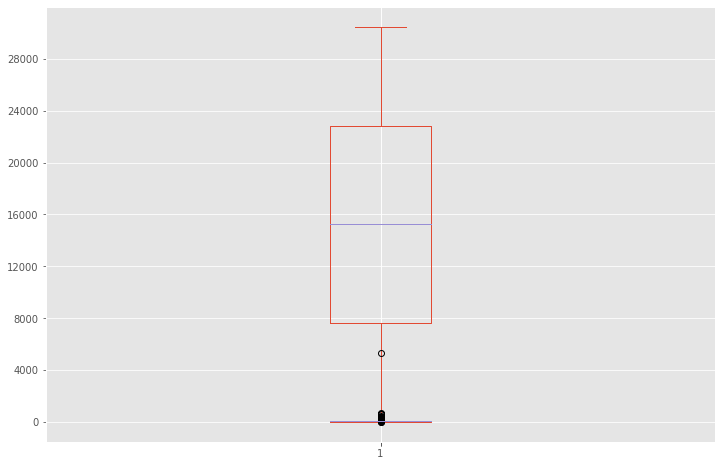

In [17]:
from matplotlib.ticker import MaxNLocator

#Force matplotlib to only display yaxis in integer format
ax = plt.figure().gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

for col in numeric_cols:
    df[col].plot(kind="box")

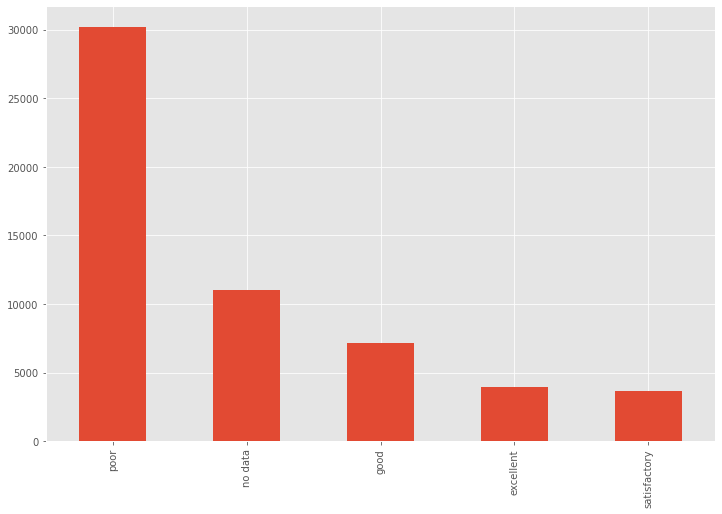

In [19]:
#df['ecology'].value_counts().plot(kind="bar")
for col in non_numeric_cols:
    df[col].value_counts().plot(kind="bar")
## TODO...

### Q5. Busque instâncias duplicadas

Note que duplicatas não precisam ser idênticas em todas as dimensões, podemos ser mais espertos e selecionar um conjuntos de características-chave que indicam a ocorrência de uma duplicata.

Faça a seguir:
- Busque e remova duplicatas baseando-se em todos os atributos da base
- Busque e remova duplicatas baseando-se nos atributos-chave `{timestamp, full_sq, life_sq, floor, build_year, num_room, price_doc}`

In [ ]:
## TODO...

### Q6. Corrija inconsistências nominais

Verifique os atributos não-numéricos (variável `df_non_numeric`) e identifique dimensões que precisam ser normalizadas (ex: converter para letra minúscula, remover espaços, símbolos, etc.)

In [48]:
new_df = df.copy()
for col in non_numeric_cols:
    new_df[col] = new_df[col].str.lower().replace(" ", "")
    re.sub('[^A-Za-z0-9]+', '', str(new_df[col]))
    print(new_df[col])

0        2011-08-20
1        2011-08-23
2        2011-08-27
3        2011-09-01
4        2011-09-05
            ...    
30466    2015-06-30
30467    2015-06-30
30468    2015-06-30
30469    2015-06-30
30470    2015-06-30
Name: timestamp, Length: 30471, dtype: object
0           investment
1           investment
2           investment
3           investment
4           investment
             ...      
30466       investment
30467       investment
30468    owneroccupier
30469       investment
30470       investment
Name: product_type, Length: 30471, dtype: object
0                    bibirevo
1          nagatinskij zaton 
2              tekstil'shhiki
3                     mitino 
4                  basmannoe 
                 ...         
30466                otradnoe
30467                tverskoe
30468    poselenie vnukovskoe
30469            obruchevskoe
30470             novogireevo
Name: sub_area, Length: 30471, dtype: object
0         no
1        yes
2         no
3         no
4    

## Conversão simbólica-numérica

### Q7. Converta os atributos nominais em numéricos 

Variável `df_non_numeric`. Utilize a(s) abordagem(ns) de sua escolha. **Justifique suas escolhas**.

In [ ]:
## TODO...

## Redução de dimensionalidade

### Q8. Confira se existe alta correlação entre atributos da base.

* Apresente a matriz de correlação 
* Localize e aponte grupos de atributos que apresentam alta correlação entre si. 
* Aproveite e imprima o top10 atributos com maior correlação (top10 positiva e top10 negativa) com a classe a ser predita, `price_doc`.

In [ ]:
## TODO...